## Welcome to the Main Trigger -- _Manual Version_

This is a Jupyter Notebook that is temporarily used as the main trigger for training and testing the GDQN model. Certain values, such as training period, are hardcoded for now and since the practice is not sustainable we plan to provide better alternatives soon.

> Yes, we are very outdated and you need to run scripts by hand, unfortunately. If you think that's miserable, think about the respectable developer who did this hundreds of times... (crying...)

In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import gymnasium as gym, torch
import matplotlib.pyplot as plt
from agent import DQNAgent
from agent_portfolio import AgentPortfolio
from utils.helper import plot_durations
import utils.envs

device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else "cpu"
)

Agent Module Loaded
GDQN Agent imported successfully for testing!


### Traing the Agent

The following code trains the GDQN Agent. The period has been harcoded as 7 years and the model will automatically use the first 7 years of daily stock data for training. The rest are discarded.

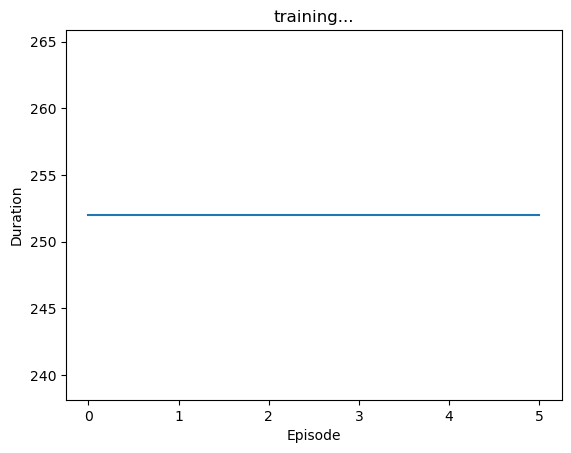

<Figure size 640x480 with 0 Axes>

In [ ]:
env = gym.make('trading-v0')

num_episodes = 7 # We have 7 years of data in training and 3 years in testing

agent = DQNAgent(env, device)

episode_durations = agent.train_agent(num_episodes)

# we can decide if we want to modularize this as well, but probably no?
# if yes we will add it to the DQNAgent.train_agent() method
print("Training Complete")
plot_durations(episode_durations, show_result=True)
plt.ioff()
plt.show()

### Testing the agent

To test the agent, we will use 3 years of 10 years total stock data. The start date for now is manually specified, but we can make simple changes to make it filter / process the data and start automatically for 3 years after 7 years.

Environment imported successfully


/opt/miniconda3/envs/myenv/lib/python3.8/site-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (20, 10)
  logger.warn(


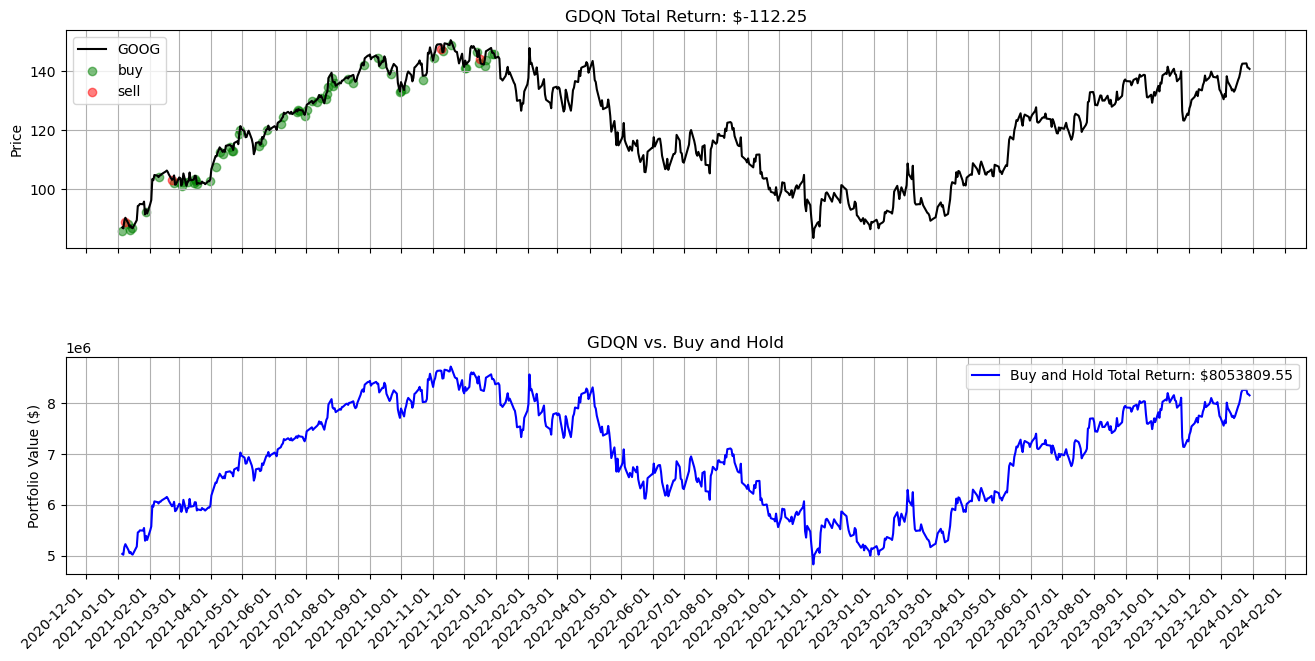

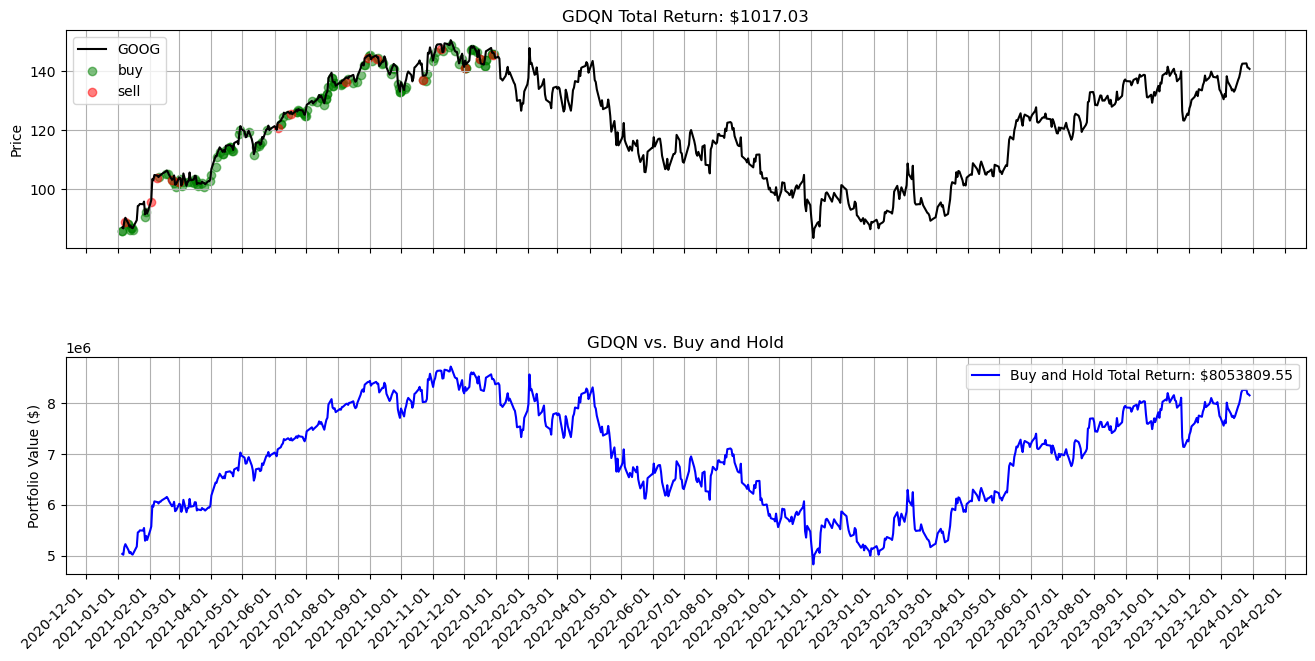

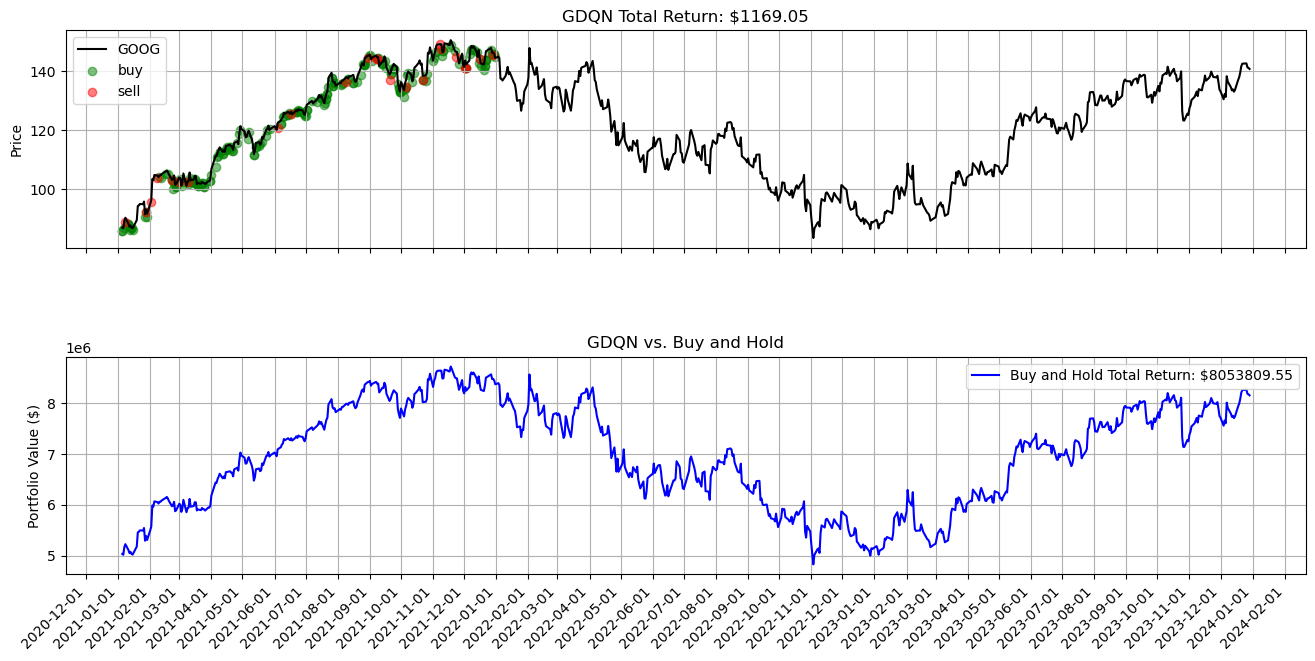

Testing Complete


In [2]:
# hardcode for now the testing period
test_env = gym.make("trading-v0")

test_agent = AgentPortfolio(test_env, device, "../models/gdqn_trained.pth", 100_000)

test_agent.test_agent(3)

print("Testing Complete")